In [2]:
# Scientific
import random
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import expon

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ML
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Parallelization
from joblib import Parallel, delayed
from tqdm import tqdm

# Typing
from nptyping import NDArray, Float64, Shape

# Setting Notebook Options
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
pd.set_option('display.max_rows', 100, 'display.max_columns', 100)
seed = np.random.randint(0, 1e9)


In [3]:
from data_simulation.simulate_data import Experiment
exp1 = Experiment(max_cluster_number=6)
df = exp1.df
X = exp1.X
X.shape

(74, 2)

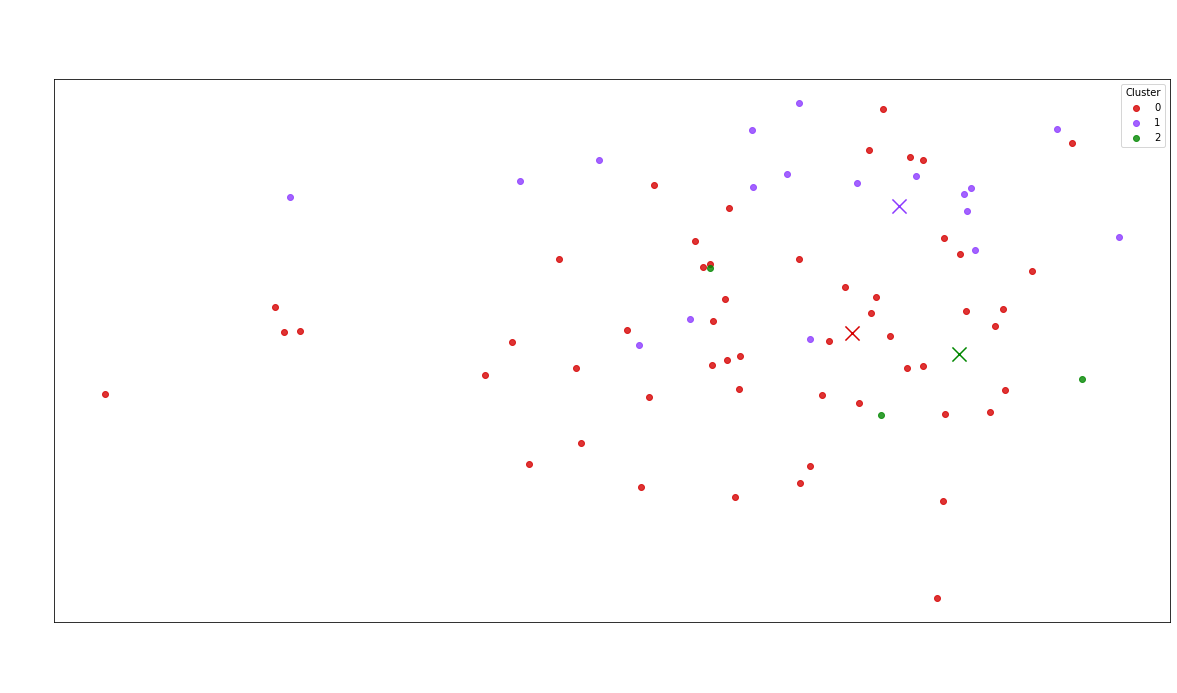

In [4]:
from plotting.plot_funcs import plot_cluster

plot_cluster(exp1.df, "cluster", title="True Clusters")

### Cluster initialization

In [5]:
from cluster_initialization.init_class import Cluster_initialization, Routine

cluster_init = Cluster_initialization(exp1.df, routine = Routine.random_inside)
params_array = cluster_init.init_params_array
init_params = cluster_init.init_params

In [6]:
from plotting.plot_funcs import plot_responsibilities
from IPython.display import display

if cluster_init.variant in ["OPTICS", "OPTICS_weighted"]:
    fig = plot_responsibilities(exp1, params_array)
    display(fig)
    fig = plot_cluster(cluster_init.df, "init_cluster", title="Cluster initizialization")
    display(fig)

Single Run

In [7]:
from model_selection.run import model_selection_run

em_params = {
    "max_iter": 500,
    "em_tol": 1e-5,
    "min_mix_coef": 0.00
}

init_params = {
    "N_cluster_max": 6,
    "N_runs_per_clusternumber": 10
}
parallel_params = {
    "n_jobs": 10
}

df_scores, results = model_selection_run(X, cluster_init, em_params, init_params, parallel_params)

In [8]:
df_scores.head(50)

,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank
0,15,147,1.220546,-138.537944,146.537944,155.754205,149.059161,0.330771,54.171370,2,14,12,12,13,1,2,54,1,0.904717,1
1,14,102,0.788090,-138.537952,146.537952,155.754213,149.059163,0.330771,54.171370,2,15,13,13,14,1,2,58,2,0.904717,2
2,13,127,1.147379,-138.537958,146.537958,155.754218,149.059175,0.330771,54.171370,2,16,14,14,15,1,2,62,3,0.904717,3
3,19,115,0.965054,-138.537982,146.537982,155.754243,149.059219,0.330771,54.171370,2,17,15,15,16,1,2,66,4,0.904716,4
4,17,119,0.941690,-138.537989,146.537989,155.754249,149.059225,0.330771,54.171370,2,18,16,16,17,1,2,70,5,0.904716,5
5,16,113,0.908811,-138.538013,146.538013,155.754273,149.059274,0.330771,54.171370,2,19,17,17,18,1,2,74,6,0.904716,6
6,8,2,0.276912,-130.440116,134.440116,139.048246,137.488012,0.000000,0.000000,1,1,1,1,1,23,39,66,4,0.879336,7
7,0,2,0.279020,-130.440116,134.440116,139.048246,137.488012,0.000000,0.000000,1,2,2,2,2,23,39,70,5,0.879336,8
8,9,2,0.277184,-130.440116,134.440116,139.048246,137.488012,0.000000,0.000000,1,3,3,3,3,23,39,74,6,0.879336,9
9,7,2,0.279940,-130.440116,134.440116,139.048246,137.488012,0.000000,0.000000,1,4,4,4,4,23,39,78,7,0.879336,10


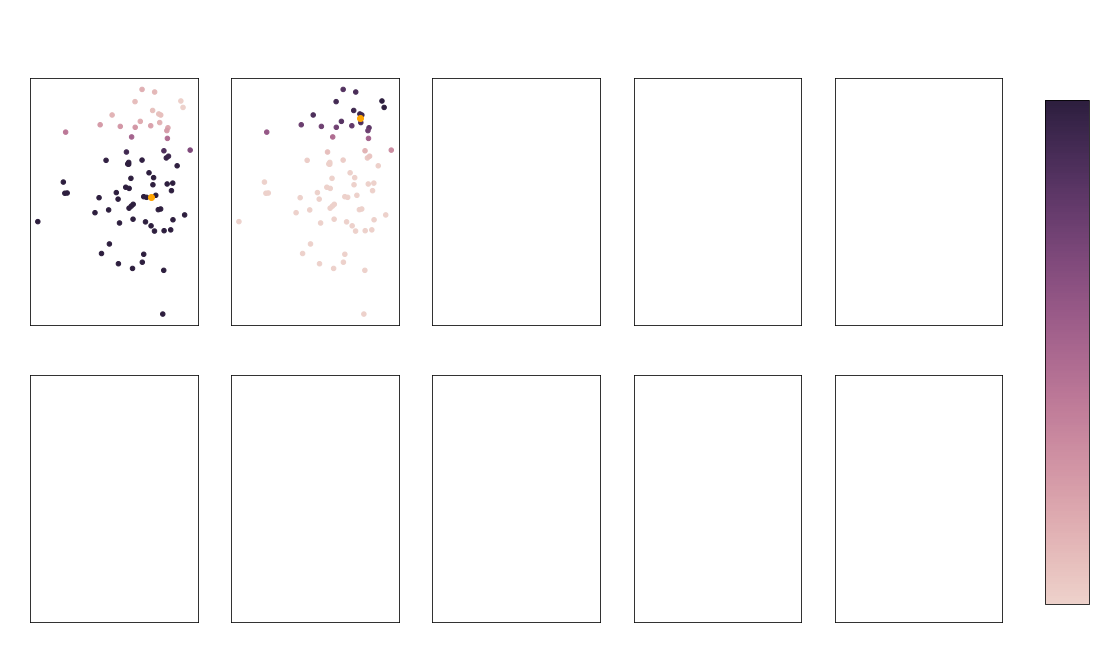

In [9]:
model_idx = 0

plot_responsibilities(exp1, results["params"][df_scores.param_index[model_idx]])  # best AIC score

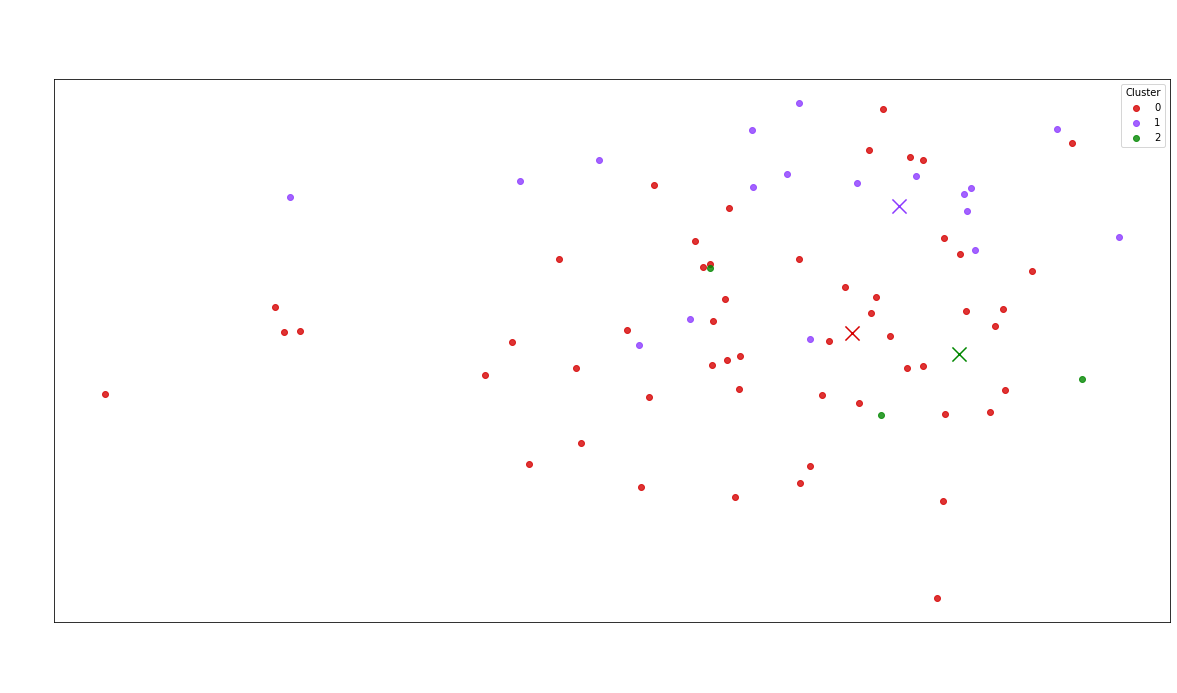

In [10]:
plot_cluster(exp1.df, "cluster", title="True Clusters")

In [11]:
from post_processing.identfy_clusters import get_prediction_df

df_pred = get_prediction_df(exp1.df.copy(), results, df_scores)

In [20]:
df_pred.loc[0:0, :]

,cluster,x_mean_og,y_mean_og,y_std_og,prediction_cluster,x_mean,y_mean,y_std,center_distance,x,y,gamma_0,gamma_1,identified_as_cluster
0,0,0.49982,2.38318,0.872643,0,0.529425,2.229453,0.687214,0.164144,0.184708,3.173133,0.925414,0.074586,0


In [22]:
df_pred[df_pred.index==0]

,cluster,x_mean_og,y_mean_og,y_std_og,prediction_cluster,x_mean,y_mean,y_std,center_distance,x,y,gamma_0,gamma_1,identified_as_cluster
0,0,0.49982,2.38318,0.872643,0,0.529425,2.229453,0.687214,0.164144,0.184708,3.173133,0.925414,0.074586,0


1